<a href="https://colab.research.google.com/github/Nagmashaik123/Section203-Group06/blob/main/LDA_Analysis_Vacc_Brands.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [5]:
import re
import os
import io
import spacy
import string
import numpy as np
import pandas as pd

# Gensim
import gensim
from gensim import models
import gensim.corpora as corpora
from gensim.models import Phrases
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import warnings
warnings.filterwarnings('ignore')


# Read and Prepare Dataset

In [7]:
dataset = pd.read_csv("ProcessedCovidVaccineReact.csv", index_col=0)
dataset.shape

(206250, 6)

In [8]:
dataset = dataset.dropna() # drop null values
dataset.shape

(205574, 6)

In [9]:
dataset

,TweetText,CleanedTweet,TweetAuthor,TweetLocation,AllHashtags,Country
TweetDate,,,,,,
2021-04-02 23:59:56,RT @ichaydon: A year ago I tried the Moderna v...,rt ichaydon year ago tried moderna vaccine see...,realbafomet,United Arab Emirates,['COVIDvaccine'],United Arab Emirates
2021-04-02 23:59:53,RT @hotvickkrishna: Why we need Two Doses of m...,rt hotvickkrishna need two doses mrna vaccine ...,EVANtiel,Unknown,"['vaccines', 'COVID19', 'Pfizer', 'moderna', '...",Unknown
2021-04-02 23:59:46,RT @StephMillerShow: Stick it in! Moderna Mama...,rt stephmillershow stick moderna mama house ya...,anessia40,Unknown,"['vaccinated', 'VaccinesWork', 'VaccinesSaveLi...",Unknown
2021-04-02 23:59:43,RT @hotvickkrishna: Why we need Two Doses of m...,rt hotvickkrishna need two doses mrna vaccine ...,tammeeh,Kota Petir,"['vaccines', 'COVID19', 'Pfizer', 'moderna', '...",Indonesia
2021-04-02 23:59:43,RT @ichaydon: A year ago I tried the Moderna v...,rt ichaydon year ago tried moderna vaccine see...,shipshape555,San Diego,['COVIDvaccine'],United States
...,...,...,...,...,...,...
2021-03-10 22:35:54,I blasted this in the car as an Army nurse gav...,blasted car army nurse gave covid vaccine toda...,MatthewDWhite2,New Orleans,"['vaccinated', 'vaccine', 'rona', 'Mississippi...",United States
2021-03-10 22:35:48,2nd #Pfizer shot!! I’m vaccinated! Thank you @...,pfizer shot im vaccinated thank vanyharbor gre...,NYMetroVets,Bronx,"['Pfizer', 'Veterans', 'CovidVaccine']",United States
2021-03-10 22:35:09,@Sarahluvshkey77 Tomorrow is two weeks since m...,tomorrow two weeks since second shot appointme...,G8rgrrlCheryl,Western Washington,['vaccinated'],United States


In [10]:
text_data = dataset["CleanedTweet"]  # select cleaned tweets column


In [11]:
text__data =  [text.split() for text in text_data]  # tokenize dataset

In [12]:
text__data

[['rt',
  'ichaydon',
  'year',
  'ago',
  'tried',
  'moderna',
  'vaccine',
  'see',
  'safe',
  'spoiler',
  'covidvaccine',
  'anniversary',
  'im',
  'hap'],
 ['rt',
  'hotvickkrishna',
  'need',
  'two',
  'doses',
  'mrna',
  'vaccine',
  'vaccines',
  'pfizer',
  'moderna',
  'vaccinessavelives',
  'vaccinated',
  'httpstco'],
 ['rt',
  'stephmillershow',
  'stick',
  'moderna',
  'mama',
  'house',
  'yall',
  'vaccinated',
  'vaccineswork',
  'vaccinessavelives',
  'httpstco'],
 ['rt',
  'hotvickkrishna',
  'need',
  'two',
  'doses',
  'mrna',
  'vaccine',
  'vaccines',
  'pfizer',
  'moderna',
  'vaccinessavelives',
  'vaccinated',
  'httpstco'],
 ['rt',
  'ichaydon',
  'year',
  'ago',
  'tried',
  'moderna',
  'vaccine',
  'see',
  'safe',
  'spoiler',
  'covidvaccine',
  'anniversary',
  'im',
  'hap'],
 ['didnt', 'throw', 'away', 'chance', 'get', 'shot', 'vaccinated'],
 ['rt',
  'hotvickkrishna',
  'need',
  'two',
  'doses',
  'mrna',
  'vaccine',
  'vaccines',
  'pfiz

In [13]:
brand_keywords =['Covax','Vax','behalf_covax','Covishield','borisjohnson','johnson','johnsonandjohnson',
           'johnsonandjohnsonvaccine','moderna','modernavaccine','modernapfizer','teammoderna','pfizercovidvaccine',
           'pfizervaccine','pfizer']
text_data = []
for tweetSentence in text__data:
  
  sent = []
  for tweetWord in tweetSentence:
    if tweetWord in brand_keywords:
        sent.append(tweetWord)
       
  if sent:
    text_data.append(sent)


In [14]:
text_data

[['moderna'],
 ['pfizer', 'moderna'],
 ['moderna'],
 ['pfizer', 'moderna'],
 ['moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['moderna'],
 ['moderna', 'pfizer'],
 ['pfizer', 'moderna'],
 ['moderna'],
 ['moderna'],
 ['pfizer'],
 ['pfizer', 'moderna'],
 ['johnsonandjohnson'],
 ['pfizer', 'moderna'],
 ['pfizer', 'pfizer', 'pfizercovidvaccine'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['moderna'],
 ['moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['modernapfizer', 'pfizer', 'moderna'],
 ['moderna'],
 ['moderna'],
 ['moderna'],
 ['moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['moderna'],
 ['moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'modern

### Make Bigrams for LDA Model

In [15]:
# Build the bigram models
bigram = gensim.models.Phrases(text_data, min_count=1) # higher threshold fewer phrases.

# Faster way to get a sentence clubbed as a bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)

text_data = [bigram_mod[doc] for doc in text_data]

In [16]:
text_data

[['moderna'],
 ['pfizer', 'moderna'],
 ['moderna'],
 ['pfizer', 'moderna'],
 ['moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['moderna'],
 ['moderna', 'pfizer'],
 ['pfizer', 'moderna'],
 ['moderna'],
 ['moderna'],
 ['pfizer'],
 ['pfizer', 'moderna'],
 ['johnsonandjohnson'],
 ['pfizer', 'moderna'],
 ['pfizer', 'pfizer', 'pfizercovidvaccine'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['moderna'],
 ['moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['modernapfizer', 'pfizer', 'moderna'],
 ['moderna'],
 ['moderna'],
 ['moderna'],
 ['moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'moderna'],
 ['moderna'],
 ['moderna'],
 ['pfizer', 'moderna'],
 ['pfizer', 'modern

# Build Dictionary

In [17]:
# make dictionary of complete corpus
dictionary_LDA = corpora.Dictionary(text_data)
# filter tokens below frequency of 3 words
dictionary_LDA.filter_extremes(no_below=3)
# index to words 
corpus = [dictionary_LDA.doc2bow(tok) for tok in text_data]

# Build LDA Model
# Compute Coherence and Preplexity
# Choose optimal number of topics

In [18]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    
    topics_list = [2, 4, 6, 8, 10, 12]
    coherence_values = []
    perplexity_val = []
    model_list = []
    for num_topics in topics_list:
        model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary_LDA, passes=4, alpha=0.05, eta=[0.01]*len(dictionary_LDA.keys()))
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=text_data, dictionary=dictionary_LDA, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        perplexity_val.append(model.log_perplexity(corpus))

    return model_list, coherence_values, perplexity_val

# Train LDA Model

In [19]:
# Can take a long time to run.
model_list, coherence_values, perplexity_val = compute_coherence_values(dictionary=dictionary_LDA, corpus=corpus, texts=text_data, start=2, limit=40, step=6)

# Plot Coherence Scores

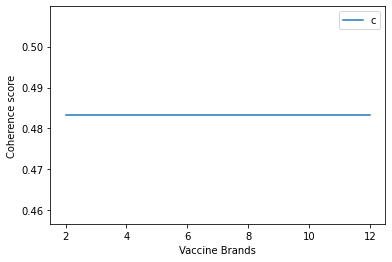

In [20]:
# Show graph
import matplotlib.pyplot as plt

topics_list = [2, 4, 6, 8, 10, 12]
plt.plot(topics_list, coherence_values)
plt.xlabel("Vaccine Brands")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

# Plot Perplexity Scores

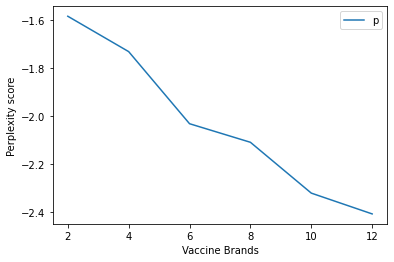

In [23]:
# Show graph
import matplotlib.pyplot as plt

topics_list = [2, 4, 6, 8, 10, 12]
plt.plot(topics_list, perplexity_val)
plt.xlabel("Vaccine Brands")
plt.ylabel("Perplexity score")
plt.legend(("perplexity_values"), loc='best')
plt.show()

### Display Results

In [25]:
# Print the coherence scores
topics_list = [2, 4, 6, 8, 10, 12]
for m, cv, pr in zip(topics_list, coherence_values, perplexity_val):
    print("Vaccine Brands =", m, " has Coherence Value of", round(cv, 4), " has Perplexity of", round(pr, 4))

Vaccine Brands = 2  has Coherence Value of 0.4833  has Perplexity of -1.5845
Vaccine Brands = 4  has Coherence Value of 0.4833  has Perplexity of -1.7315
Vaccine Brands = 6  has Coherence Value of 0.4833  has Perplexity of -2.0311
Vaccine Brands = 8  has Coherence Value of 0.4833  has Perplexity of -2.1083
Vaccine Brands = 10  has Coherence Value of 0.4833  has Perplexity of -2.3196
Vaccine Brands = 12  has Coherence Value of 0.4833  has Perplexity of -2.406


## Train Model with Best number of topics

In [26]:
best_topic_number = 10
best_model = models.LdaModel(corpus, num_topics=best_topic_number, id2word=dictionary_LDA, passes=4, alpha=0.05, eta=[0.01]*len(dictionary_LDA.keys()))
        

In [27]:
coherencemodel = CoherenceModel(model=best_model, texts=text_data, dictionary=dictionary_LDA, coherence='c_v')
coherence_score = coherencemodel.get_coherence()
perplexity_score = best_model.log_perplexity(corpus)
print("Num Topics =", best_topic_number, " has Coherence Value of", round(coherence_score, 4), " has Perplexity of", round(perplexity_score, 4))
        

Num Topics = 10  has Coherence Value of 0.4833  has Perplexity of -2.2853


In [28]:
# display all topics with weight of all keywords
for i,topic in best_model.show_topics(formatted=True, num_topics=best_topic_number, num_words=20):
    print(str(i)+": "+ topic)
    print()

0: 1.000*"borisjohnson" + 0.000*"pfizer" + 0.000*"johnson" + 0.000*"pfizervaccine" + 0.000*"johnsonandjohnson" + 0.000*"modernapfizer" + 0.000*"modernavaccine" + 0.000*"pfizercovidvaccine" + 0.000*"teammoderna" + 0.000*"johnsonandjohnsonvaccine"

1: 0.802*"pfizervaccine" + 0.198*"pfizer" + 0.000*"johnsonandjohnson" + 0.000*"modernapfizer" + 0.000*"johnsonandjohnsonvaccine" + 0.000*"pfizercovidvaccine" + 0.000*"teammoderna" + 0.000*"modernavaccine" + 0.000*"johnson" + 0.000*"borisjohnson"

2: 0.552*"johnsonandjohnson" + 0.448*"pfizercovidvaccine" + 0.000*"pfizervaccine" + 0.000*"johnsonandjohnsonvaccine" + 0.000*"pfizer" + 0.000*"modernapfizer" + 0.000*"teammoderna" + 0.000*"modernavaccine" + 0.000*"johnson" + 0.000*"borisjohnson"

3: 1.000*"pfizer" + 0.000*"johnson" + 0.000*"teammoderna" + 0.000*"johnsonandjohnson" + 0.000*"pfizercovidvaccine" + 0.000*"modernapfizer" + 0.000*"pfizervaccine" + 0.000*"modernavaccine" + 0.000*"borisjohnson" + 0.000*"johnsonandjohnsonvaccine"

4: 1.000*"pf

In [31]:
!pip install pyLDAvis==2.1.2

     |████████████████████████████████| 1.6MB 6.4MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97712 sha256=7bf511a0b21b6d5170e2458ac38af88e4faec5deaef18b0d2609520511fb4225
  Stored in directory: /root/.cache/pip/wheels/98/71/24/513a99e58bb6b8465bae4d2d5e9dba8f0bef8179e3051ac414
Successfully built pyLDAvis


# Visulaize Topics

In [32]:
import pyLDAvis
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import re
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pyLDAvis
import pyLDAvis.gensim 
warnings.filterwarnings('ignore')

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(best_model, corpus, dictionary=dictionary_LDA, mds='mmds')
vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.026887  0.290152       1        1  16.163147
4     -0.026887  0.290151       2        1  16.038303
6     -0.026886  0.290150       3        1  15.853418
7     -0.185362 -0.443851       4        1  12.327299
1     -0.333967  0.228858       5        1   8.522301
2      0.509573  0.118905       6        1   8.053240
9     -0.004986  0.151163       7        1   7.432364
0     -0.462550 -0.216702       8        1   6.503852
8      0.413698 -0.254921       9        1   4.969085
5      0.144254 -0.453903      10        1   4.136992, topic_info=              Term         Freq        Total Category  logprob  loglift
7          johnson  1977.000000  1977.000000  Default  10.0000  10.0000
0           pfizer  8573.000000  8573.000000  Default   9.0000   9.0000
8     borisjohnson  1043.000000  1043.000000  Default   8.0000   8.0000
4    pfizervaccine  1096.000000  1096.000000  Default   7.0000   7.0000
6   modernavaccine   797.000000   797.000000  Default   6.0000   6.0000
..             ...          ...          ...      ...      ...      ...
6   modernavaccine     0.016099   797.027240  Topic10 -10.6267  -7.6247
8     borisjohnson     0.016099  1043.185573  Topic10 -10.6267  -7.8939
4    pfizervaccine     0.016102  1096.466597  Topic10 -10.6264  -7.9434
7          johnson     0.016105  1977.321672  Topic10 -10.6263  -8.5329
0           pfizer     0.016795  8573.789968  Topic10 -10.5843  -9.9580

[110 rows x 6 columns], token_table=      Topic      Freq                      Term
term                                           
8         8  0.999822              borisjohnson
7         4  0.999837                   johnson
1         6  1.000398         johnsonandjohnson
9        10  1.000495  johnsonandjohnsonvaccine
3         7  1.000557             modernapfizer
6         9  0.999966            modernavaccine
0         1  0.302317                    pfizer
0         2  0.299984                    pfizer
0         3  0.296602                    pfizer
0         5  0.031608                    pfizer
0         7  0.069398                    pfizer
2         6  0.999556        pfizercovidvaccine
4         5  0.999574             pfizervaccine
5        10  1.002662               teammoderna, R=10, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 7, 8, 2, 3, 10, 1, 9, 6])

# All Topics Probabilities in each Document

In [33]:
# convert all probability distribution into dataframe (we are doing this to also keep topics having 0 probability)
# In other case topics having 0 probability will be misleading
def topics_document_to_dataframe(topics_document, num_topics):
    res = pd.DataFrame(columns=range(num_topics))
    for topic_weight in topics_document:
        res.loc[0, topic_weight[0]] = topic_weight[1]
    return res


In [34]:
# find topic probabilities that model assign to all documents
topics = [best_model[corpus[i]] for i in range(len(text_data))]

In [35]:
# make dataframe of all document probability distribution
document_topic = \
pd.concat([topics_document_to_dataframe(topics_document, num_topics=best_topic_number) for topics_document in topics]) \
  .reset_index(drop=True).fillna(0)

In [37]:
document_topic.head(10)

,0,1,2,3,4,5,6,7,8,9
0,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,0.033333,0.033333,0.033333,0.033333,0.700000,0.033333,0.033333,0.033333,0.033333,0.033333
2,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
3,0.033333,0.033333,0.033333,0.700000,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333
4,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
5,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.700000,0.033333,0.033333,0.033333
6,0.033333,0.033333,0.033333,0.033333,0.700000,0.033333,0.033333,0.033333,0.033333,0.033333
7,0.033333,0.033333,0.033333,0.033333,0.033333,0.033333,0.700000,0.033333,0.033333,0.033333
8,0.033333,0.033333,0.033333,0.033333,0.700000,0.033333,0.033333,0.033333,0.033333,0.033333
9,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000


# Calculate and Find Keywords in each Document


In [36]:
def format_topics_sentences(ldamodel=best_model, corpus=corpus, texts=text_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Per_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=best_model, corpus=corpus, texts=text_data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.1,"borisjohnson, pfizer, johnson, pfizervaccine, ...",[moderna]
1,1,6.0,0.7,"pfizer, pfizercovidvaccine, modernapfizer, joh...","[pfizer, moderna]"
2,2,0.0,0.1,"borisjohnson, pfizer, johnson, pfizervaccine, ...",[moderna]
3,3,4.0,0.7,"pfizer, pfizervaccine, johnsonandjohnsonvaccin...","[pfizer, moderna]"
4,4,0.0,0.1,"borisjohnson, pfizer, johnson, pfizervaccine, ...",[moderna]
5,5,3.0,0.7,"pfizer, johnson, teammoderna, johnsonandjohnso...","[pfizer, moderna]"
6,6,4.0,0.7,"pfizer, pfizervaccine, johnsonandjohnsonvaccin...","[pfizer, moderna]"
7,7,6.0,0.7,"pfizer, pfizercovidvaccine, modernapfizer, joh...","[pfizer, moderna]"
8,8,4.0,0.7,"pfizer, pfizervaccine, johnsonandjohnsonvaccin...","[pfizer, moderna]"
9,9,0.0,0.1,"borisjohnson, pfizer, johnson, pfizervaccine, ...",[moderna]
